<a href="https://colab.research.google.com/github/shraddharamesh93/CMSC320-Final-Project/blob/main/Technica_2023_Noisy_Labeled_Data_Detection_By_Diffusion_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unconditional Image Generation

 Uncoditional Image Generation involves generating images without a prompt.

In [2]:
!pip install diffusers
!pip install transformers
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.9 MB/s eta 0:00:00


In [3]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

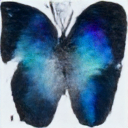

In [6]:
generator.to("cuda")
image = generator().images[0]
image

# Conditional Image Generation

Conditional Image Generation produces an image given a text prompt.

In [7]:
!pip install diffusers
!pip install transformers

In [8]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
generator.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.21.4",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

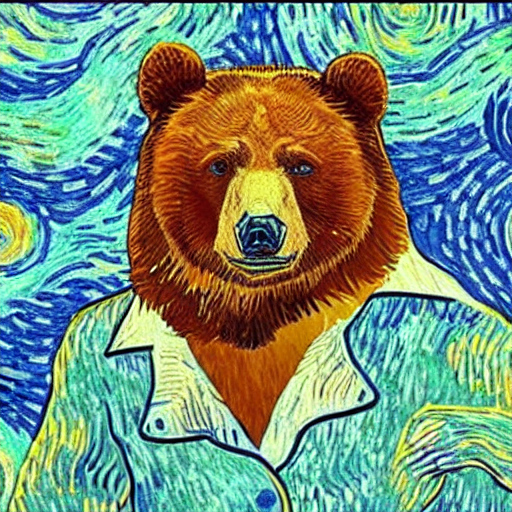

In [11]:
image = generator("An image of a bear in van Gogh style").images[0]
image

# In Painting

We used the StableDiffusionInpaintPipeline, which allows you to edit certain parts of an image by providing a text prompt and a mask. This is useful when you want some parts of the image to stay the same and only others to be changed by the text prompt.

In [12]:
!pip install diffusers
!pip install transformers

In [13]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")

text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [15]:
def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

  0%|          | 0/50 [00:00<?, ?it/s]

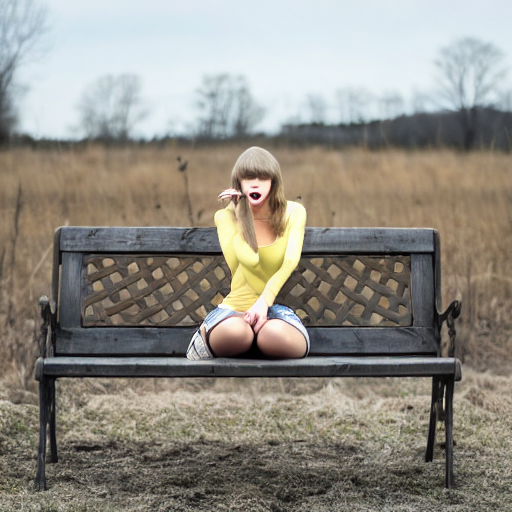

In [17]:
# it is only masking the area around the her, so the bench will stay
prompt = "Taylor Swift, high resolution"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

# Image to Image

The StableDiffusionImg2ImgPipeline allows you to input an image and a text prompt on how to modify the image based on a condition, and a new image will be created that meets these conditions.

In [18]:
!pip install diffusers transformers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.9 MB/s eta 0:00:00


In [19]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16).to(
    device
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


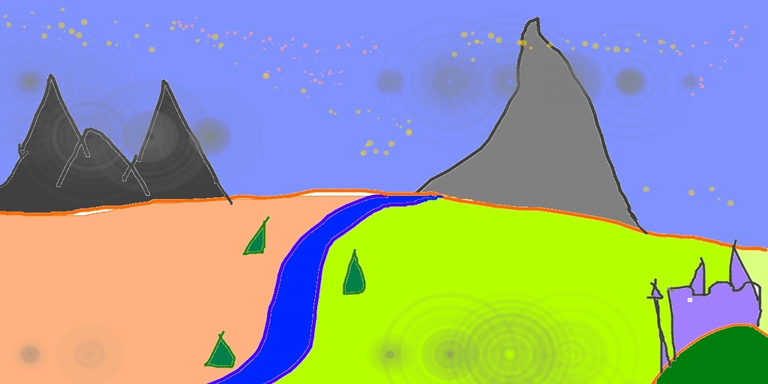

In [20]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))
init_image

  0%|          | 0/37 [00:00<?, ?it/s]

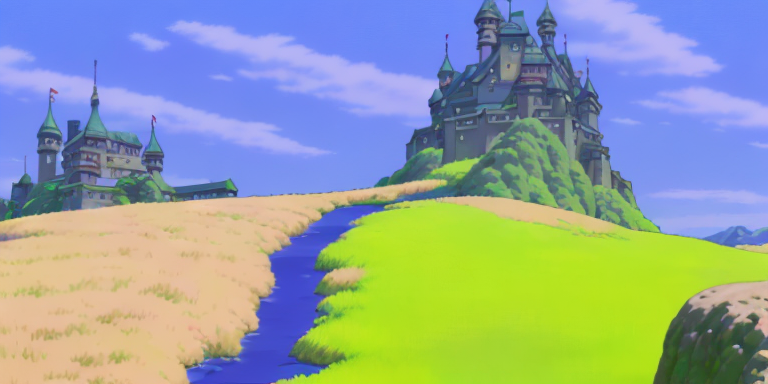

In [21]:
prompt = "ghibli style, a fantasy landscape with castles"
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

  0%|          | 0/37 [00:00<?, ?it/s]

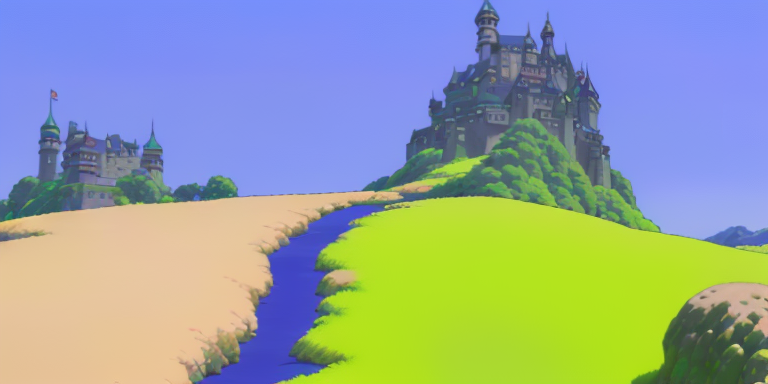

In [22]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

# CLIP Model

The CLIP Model states how to compute similiarity between text and images. It also demonstrates zero shot classification, where we are not training the model on our own data. We train it with an input of image-caption pairs

In [23]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bwlx3i2l
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-bwlx3i2l
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=2179cc406fecef55b1f1b33978da8b01ef4fc041c4d743f07799ba76e808f08f
  Stored in directory: /tmp/pip-ephem-wheel-cache-qc0m1v4_/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [24]:
import torch
import clip
from PIL import Image

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("RN50", device=device)

100%|███████████████████████████████████████| 244M/244M [00:04<00:00, 51.7MiB/s]


In [27]:
# unsqueeze on dimension 0 -> indicates the position on which to add a dimension
# we want to see if the model is capable of zero-shot classification: we are not training the model on our own data
# squeeze (1, 3, 256, 256) -> (3, 256, 256), and unsqueeze (3, 256, 256) -> (1, 3, 256, 256)
# 3 = RBG, 256 x 256 is the image dimension
image = preprocess(Image.open("dog.png")).unsqueeze(0).to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [28]:
texts = clip.tokenize(["A Cat", "A Monkey", "A Dog", "A Lizard", "A Horse"]).to(device)

In [29]:
with torch.no_grad():
  image_features = model.encode_image(image) # encode image to get the image vector
  text_features = model.encode_text(texts) # encode text to get text vector

In [30]:
text_features.shape

torch.Size([5, 1024])

In [31]:
image_features.shape

torch.Size([1, 1024])

In [32]:
# it tells you the similarity between these two vectors
# we should get 5 numbers to show the association between each image and text token, and the highest number is the closest classification.
# t is transposing it: We have (1, 1024) and (5,1024) -> After transposing: (1, 1024) and (1024,5)
# if a = size(n,m) and p = size(p,m), we can't perform dot product. The last and first need to be same, so that's why we transpose. tensor.mm is matrix multiplication so we can get five values
similarity = torch.mm(image_features, text_features.t())

In [33]:
similarity.shape
similarity
# it has the highest number for the dog category, saw a lot of dog examples in pretraining phase and could categorize a dog correctly

tensor([[5.1406, 4.2734, 6.7539, 3.7344, 4.7891]], device='cuda:0',
       dtype=torch.float16)

The third value, the dog, has the highest cosine similarity value, so the model correctly classified the image as a dog.

# Stable Diffusion Model

We want to train a modeel to learn specific details off objects, backgrounds, styles, etc. We can train a mmodle to do this using:

*   Forward Process: Casually add Gaussian noise to the original image until it is so distorted from the original.
*   Reverse Process: Subtract Gaussian noise that we gave during the forward proceess. The main goal is ffor the model to create the exact same original image from a very noisy image: Generate something meaningful from something meaningless.



In [34]:
!pip install diffusers==0.11.1
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.21.4
    Uninstalling diffusers-0.21.4:
      Successfully uninstalled diffusers-0.21.4


In [35]:
from diffusers import DDPMPipeline

In [36]:
# move to gpu device
# pretrained with celebrity faces
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256").to("cuda")
images = image_pipe().images

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

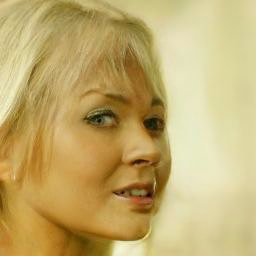

In [37]:
images[0]

In [38]:
from diffusers import UNet2DModel # butterfly thing in photo

repo_id = "google/ddpm-church-256"
model = UNet2DModel.from_pretrained(repo_id)
model

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): LoRACompatibleLinear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0

In [39]:
model.config # configuration of the model

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

How do we test a diffusion model during test time when we don't have access to the original image?

We could start with the conditionin and go to reverse diffusion. For input to the model, we provide a prompt of text, which is encoded by a text encoder.The purpose of reverse diffusion is to try to reduce noise and obtain a less noisy version of the data at each timestep until we reach x=0. The diffusion model can be pretrained with random noise sample. Then, reverse diffusion can be performed to produce an image during test time. Then, we use the decoder and generate the pixel space image.

In [40]:
import torch

# num channels: we're using RGB, so we have 3 channels
torch.manual_seed(4)
# generating a random noise sample for reverse diffusion
noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape
# we can't visualize a torch tensor directly

torch.Size([1, 3, 256, 256])

In [41]:
import torch

# num channels: we're using RGB, so we have 3 channels
torch.manual_seed(4)
# generating a random noise sample for reverse diffusion
noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape
# we can't visualize a torch tensor directly

torch.Size([1, 3, 256, 256])

In [42]:
from torchvision.transforms import ToPILImage

# x_t -> the noisier version
# residual noise  = u_net(x_t)
# x_(t-1) = x_t - residual noise (subtract some noise at each time step)
#with torch.no_grad():
  #noisy_residual = model(sample=noisy_sample, timestep=650).sample # finding whatever the noise is at timestep 2
# size of residual needs to be the same size as noisy sample to perform the subtraction

# we are updating the sample at each timestep by subtracting the residual noise (the noise at each timestep)
sample = noisy_sample
for i in range(3):
  noisy_residual = model(sample=sample, timestep=1).sample
  sample = sample - noisy_residual
  print(i)

to_pil = ToPILImage()
pil_image = to_pil(sample.squeeze(0))
pil_image

#noisy_residual.shape

# Question: At what timestep does it produce a clearer image?
# Anything below 300 seems way too low. At around 550, the image becomes slighly more clearer, although still pretty noisy. Going towards 700, it starts to become more clear.
# After 750, it becomes a bit blurry again. 650 produces a more decent image

0
1


KeyboardInterrupt: ignored

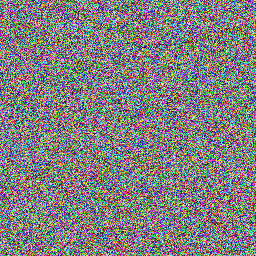

In [43]:
# de-noising process
less_noisy = noisy_sample - noisy_residual

from torchvision.transforms import ToPILImage
to_pil = ToPILImage()
# .squeeze is adding a dimnesion to our tensor: When we have [[1, 2, 3, 4, 5]] -> size is (1, 5) -> b = a.squeeze(0) -> b = [1, 2, 3, 4, 5], so size is (5)
pil_image = to_pil(less_noisy.squeeze(0))
pil_image

In [44]:
import torchvision
torchvision.utils.save_image(torch.clamp(less_noisy, 0),'1.png', normalize=True, scale_each=True )

Question: We are inputting the noisy_sample and a time_step to our unet. How do you think we can use this model in a better way?
How do we create a high quality image without the scheduler and only with the unet? Why didn't the subtraction wwork?
Visualize the less noisy image after each time step. The unet is trying to output the noisy residual.

Answer: Having a for loop, and after computing the noisy residual for each time step and the less noisy image (compute the less noisy image) and input theless noisy image to the sample. Currently, we are inputting the noisy sample and asking it to denoise it for 700 time steps but we are not updating the image in there at all. Maybe it would be better to compute the less noisy image for each iteration, and compute noisy residual for each timestep individually.

In [45]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_config(repo_id)
scheduler.config

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:239: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  Parameters:


FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('variance_type', 'fixed_small'),
            ('clip_sample', True),
            ('prediction_type', 'epsilon'),
            ('thresholding', False),
            ('dynamic_thresholding_ratio', 0.995),
            ('clip_sample_range', 1.0),
            ('sample_max_value', 1.0),
            ('timestep_spacing', 'leading'),
            ('steps_offset', 0),
            ('_use_default_values',
             ['timestep_spacing',
              'dynamic_thresholding_ratio',
              'prediction_type',
              'thresholding',
              'sample_max_value',
              'steps_offset',
              'clip_sample_range']),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_version', '0.1.1')])

In [46]:
# the scheduler tries to subtract the noisy resuidual from the noisy sample
less_noisy = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
less_noisy.shape

torch.Size([1, 3, 256, 256])

In [47]:
import PIL.Image
import numpy as np

def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [48]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

  5%|▍         | 49/1000 [00:06<01:56,  8.18it/s]

'Image at step 50'

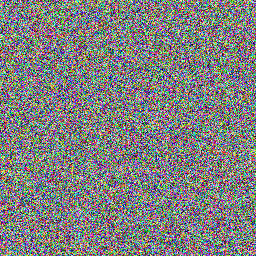

 10%|▉         | 99/1000 [00:12<01:53,  7.91it/s]

'Image at step 100'

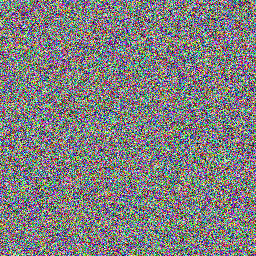

 15%|█▍        | 149/1000 [00:18<01:45,  8.05it/s]

'Image at step 150'

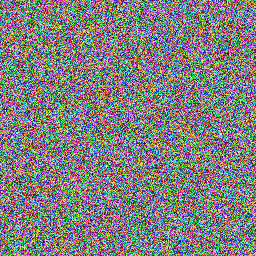

 20%|█▉        | 199/1000 [00:24<01:40,  7.99it/s]

'Image at step 200'

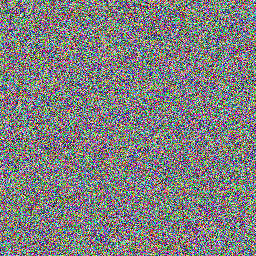

 25%|██▍       | 249/1000 [00:31<01:34,  7.96it/s]

'Image at step 250'

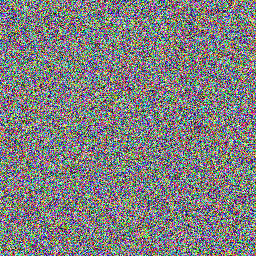

 30%|██▉       | 299/1000 [00:37<01:27,  8.05it/s]

'Image at step 300'

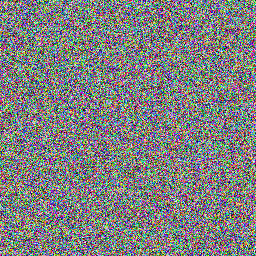

 35%|███▍      | 349/1000 [00:44<01:22,  7.88it/s]

'Image at step 350'

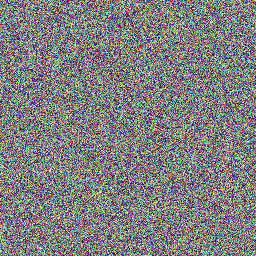

 40%|███▉      | 399/1000 [00:50<01:14,  8.07it/s]

'Image at step 400'

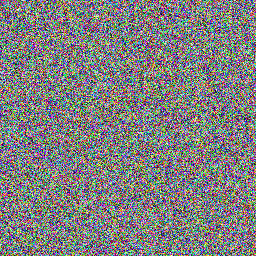

 45%|████▍     | 449/1000 [00:56<01:08,  8.02it/s]

'Image at step 450'

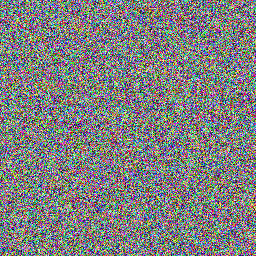

 50%|████▉     | 499/1000 [01:03<01:01,  8.15it/s]

'Image at step 500'

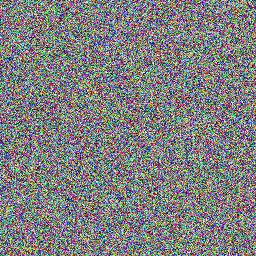

 55%|█████▍    | 549/1000 [01:09<00:57,  7.89it/s]

'Image at step 550'

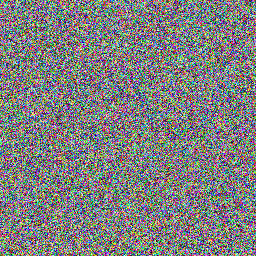

 60%|█████▉    | 599/1000 [01:15<00:48,  8.20it/s]

'Image at step 600'

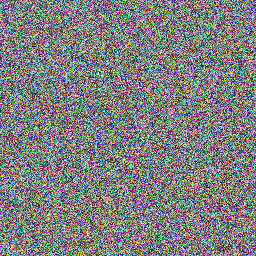

 65%|██████▍   | 649/1000 [01:21<00:42,  8.27it/s]

'Image at step 650'

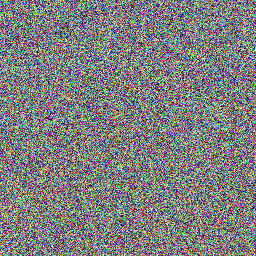

 70%|██████▉   | 699/1000 [01:27<00:36,  8.31it/s]

'Image at step 700'

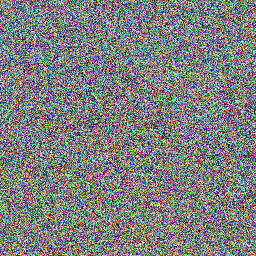

 75%|███████▍  | 749/1000 [01:34<00:30,  8.19it/s]

'Image at step 750'

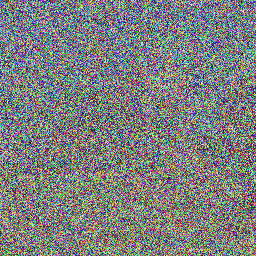

 80%|███████▉  | 799/1000 [01:40<00:24,  8.06it/s]

'Image at step 800'

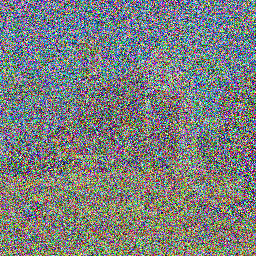

 85%|████████▍ | 849/1000 [01:46<00:19,  7.93it/s]

'Image at step 850'

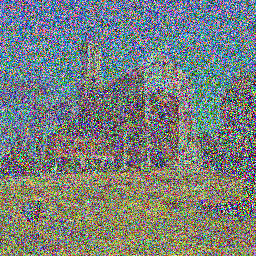

 90%|████████▉ | 899/1000 [01:52<00:12,  7.97it/s]

'Image at step 900'

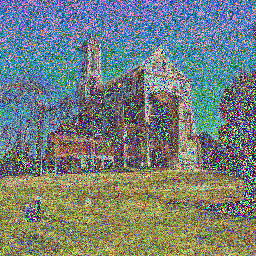

 95%|█████████▍| 949/1000 [01:58<00:06,  7.65it/s]

'Image at step 950'

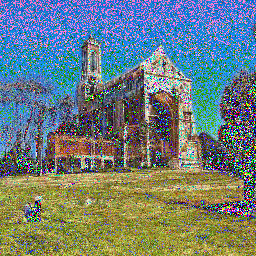

100%|█████████▉| 999/1000 [02:05<00:00,  8.14it/s]

'Image at step 1000'

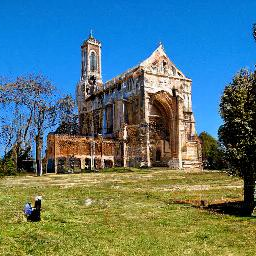

100%|██████████| 1000/1000 [02:05<00:00,  7.98it/s]


In [49]:
import tqdm

sample = noisy_sample

# unet and scheduler are trained for different purposes
# the timesteps is the number of timesteps we use in training the diffusion model (so we can go n timesteps back)
for i,t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  #1. Predict noise residual
  with torch.no_grad():
    residual = model(sample, t).sample

  #2: Computer less noisy image and set x_t -> x_(t-1)
  sample = scheduler.step(residual,t,sample).prev_sample

  #3: Optimally look for image
  if (i + 1) % 50 == 0:
    display_sample(sample, i + 1)